<b>Notebook created by Matilda Eriksson at 2021-04-08
<br>
Last updated: 2021-04-19</b><br><br>
<b>Data Source:</b> https://www.kaggle.com/blastchar/telco-customer-churn

This is a dataset from a fictional Telecommunications company. 

My intention is to find a good method to identify customers that are likely to churn and features correlated to this. I have summarized the problem statement as following:

<b><i>Can we determine what causes customer to cancel their accounts so that we can devise strategies to make improvements to our customer retention program and reduce churn?</i></b>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
%matplotlib inline
sns.set_style('dark')
sns.set_palette('husl')

# <font color='green'>EDA & Cleaning</font>

In [2]:
df = pd.read_csv('MyProjects/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.duplicated().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<i>"TotalCharges" is currently an object-type. I will change it to numeric since it has a continious value. I will also remove the customerID column since I will not use it in the analysis.</i>

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.drop(columns='customerID', inplace=True)

<i>"TotalCharges" has some missing values. These are from customers who have not yet received their first invoice. I will set their value to 0</i>

In [8]:
df['TotalCharges'].fillna(0, inplace=True)

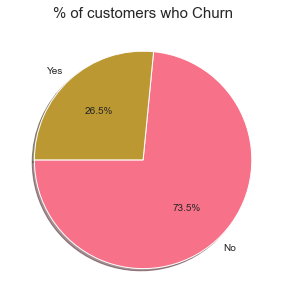

In [9]:
plt.figure(figsize=(5,5))
plt.pie(df['Churn'].value_counts(sort=True), autopct='%1.1f%%', shadow=True, startangle=180,
        labels=['No', 'Yes'])
plt.title('% of customers who Churn', size=15);


<b> The over all churn rate is 27%</b>

# Distributions

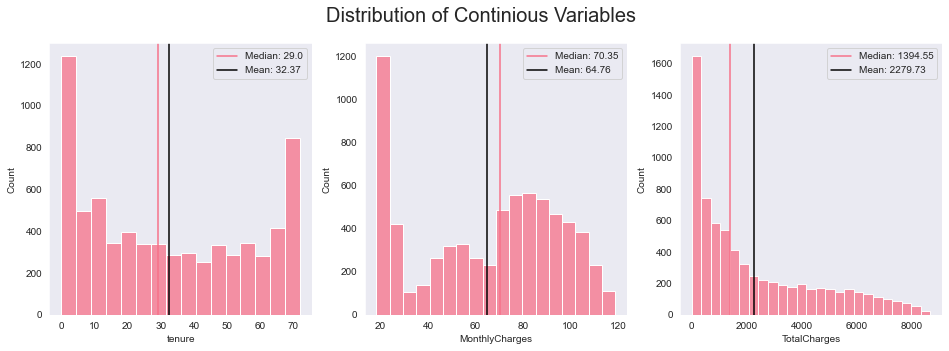

In [19]:
sns.set_style('dark')
sns.set_palette('husl')
fig, axes = plt.subplots(1, 3, figsize=(16,5))
sns.histplot(ax=axes[0], x=df.tenure)
fig.suptitle('Distribution of Continious Variables', size=20)
axes[0].axvline(np.median(df['tenure']), label='Median: ' + str(np.median(df['tenure'])))
axes[0].axvline(np.mean(df['tenure']), color='black', label='Mean: ' + str(np.round(np.mean(df['tenure']),2)))
axes[0].legend()
sns.histplot(ax=axes[1], x='MonthlyCharges', data=df)
axes[1].axvline(np.median(df['MonthlyCharges']), label= 'Median: ' + str(np.median(df['MonthlyCharges'])))
axes[1].axvline(np.mean(df['MonthlyCharges']), color='black', label='Mean: ' + str(np.round(np.mean(df['MonthlyCharges']),2)))
axes[1].legend()
sns.histplot(ax=axes[2], x='TotalCharges', data=df)
axes[2].axvline(np.nanmedian(df['TotalCharges']), label='Median: ' + str(np.round(np.median(df['TotalCharges']),2)))
axes[2].axvline(np.nanmean(df['TotalCharges']), color='black', label='Mean: ' + str(np.round(np.mean(df['TotalCharges']),2)))
axes[2].legend()
plt.rcParams["patch.force_edgecolor"] = True;


- Tenure distribution is bimodal, with one mode of low tenure and one with high.
- Monthly Charges also has a bimodal distribution, where one big group of customers have low charges and another large group of customers have charges above average.
- TotalCharges is right skewed.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


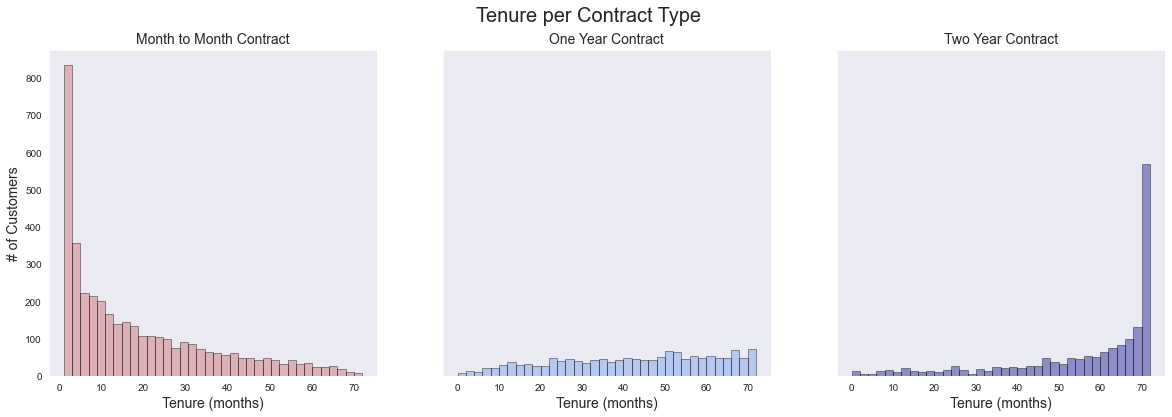

In [20]:
fig, axes = plt.subplots(1, 3, sharey = True, figsize = (20,6))
fig.suptitle('Tenure per Contract Type', size=20)

sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'indianred',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[0])
axes[0].set_ylabel('# of Customers', size=14)
axes[0].set_xlabel('Tenure (months)', size=14)
axes[0].set_title('Month to Month Contract', size=14)

sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'cornflowerblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[1])
axes[1].set_xlabel('Tenure (months)',size = 14)
axes[1].set_title('One Year Contract',size = 14)

sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[2])
axes[2].set_xlabel('Tenure (months)', size=14)
axes[2].set_title('Two Year Contract', size=14);

<i>If we look at tenure per contract type, we can see that the mode of low tenure is represented by customers with a Month-to-Month contract, while the high tenure mode is respresentet by customers with a Two-Year Contract. Makes sense!</i>

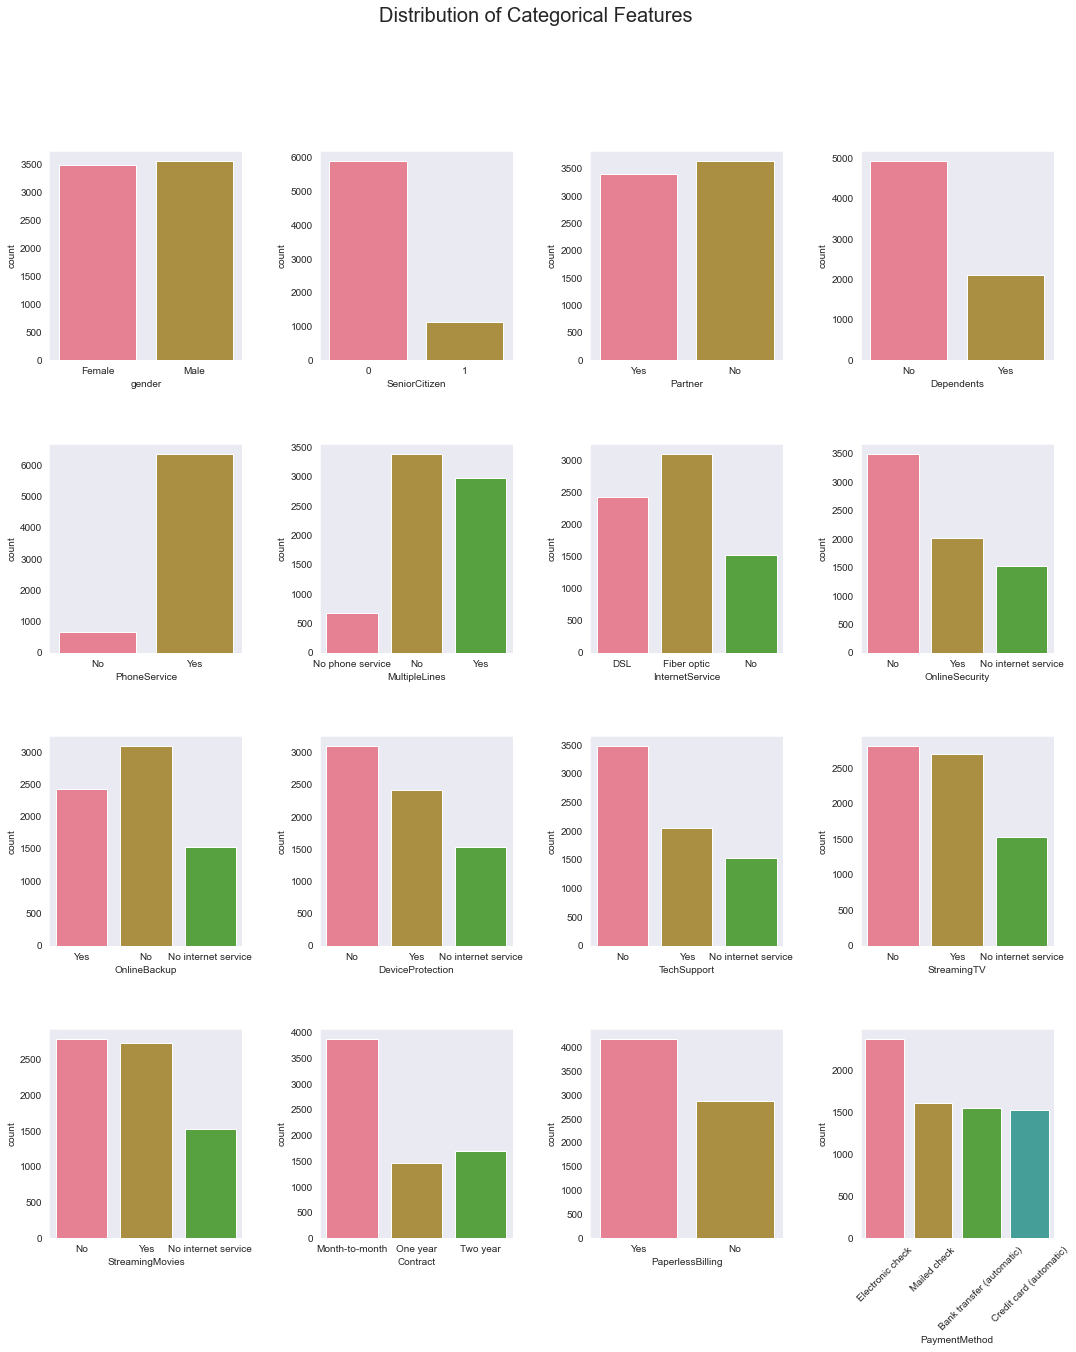

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(18,20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.set_palette('husl')
fig.suptitle('Distribution of Categorical Features', size=20)
sns.countplot(ax=axes[0,0],x='gender',data=df)
sns.countplot(ax=axes[0,1],x='SeniorCitizen',data=df)
sns.countplot(ax=axes[0,2],x='Partner',data=df)
sns.countplot(ax=axes[0,3],x='Dependents',data=df)
sns.countplot(ax=axes[1,0],x='PhoneService',data=df)
sns.countplot(ax=axes[1,1],x='MultipleLines',data=df)
sns.countplot(ax=axes[1,2],x='InternetService',data=df)
sns.countplot(ax=axes[1,3],x='OnlineSecurity',data=df)
sns.countplot(ax=axes[2,0],x='OnlineBackup',data=df)
sns.countplot(ax=axes[2,1],x='DeviceProtection',data=df)
sns.countplot(ax=axes[2,2],x='TechSupport',data=df)
sns.countplot(ax=axes[2,3],x='StreamingTV',data=df)
sns.countplot(ax=axes[3,0],x='StreamingMovies',data=df)
sns.countplot(ax=axes[3,1],x='Contract',data=df)
sns.countplot(ax=axes[3,2],x='PaperlessBilling',data=df)
sns.countplot(ax=axes[3,3],x='PaymentMethod',data=df)
plt.xticks(rotation=45);

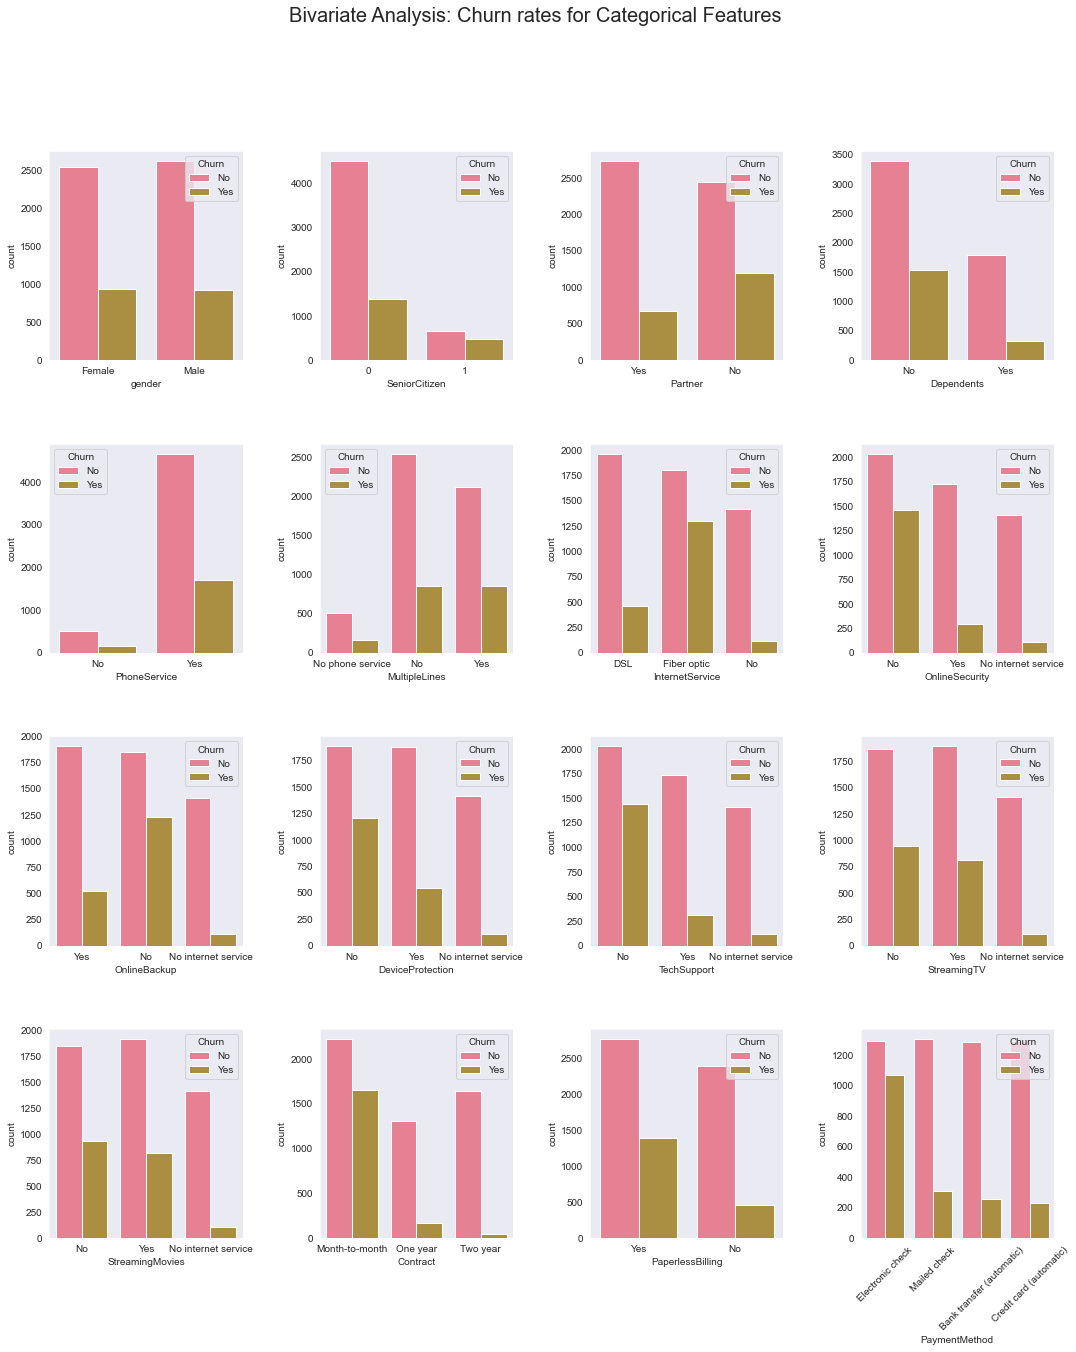

In [22]:
# Visualizing churn rate for all categorical features

fig, axes = plt.subplots(4, 4, figsize=(18,20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Bivariate Analysis: Churn rates for Categorical Features', size=20)
sns.countplot(ax=axes[0,0],x='gender',hue='Churn',data=df)
sns.countplot(ax=axes[0,1],x='SeniorCitizen',hue='Churn',data=df)
sns.countplot(ax=axes[0,2],x='Partner',hue='Churn',data=df)
sns.countplot(ax=axes[0,3],x='Dependents',hue='Churn',data=df)
sns.countplot(ax=axes[1,0],x='PhoneService',hue='Churn',data=df)
sns.countplot(ax=axes[1,1],x='MultipleLines',hue='Churn',data=df)
sns.countplot(ax=axes[1,2],x='InternetService',hue='Churn',data=df)
sns.countplot(ax=axes[1,3],x='OnlineSecurity',hue='Churn',data=df)
sns.countplot(ax=axes[2,0],x='OnlineBackup',hue='Churn',data=df)
sns.countplot(ax=axes[2,1],x='DeviceProtection',hue='Churn',data=df)
sns.countplot(ax=axes[2,2],x='TechSupport',hue='Churn',data=df)
sns.countplot(ax=axes[2,3],x='StreamingTV',hue='Churn',data=df)
sns.countplot(ax=axes[3,0],x='StreamingMovies',hue='Churn',data=df)
sns.countplot(ax=axes[3,1],x='Contract',hue='Churn',data=df)
sns.countplot(ax=axes[3,2],x='PaperlessBilling',hue='Churn',data=df)
sns.countplot(ax=axes[3,3],x='PaymentMethod',hue='Churn',data=df)
plt.xticks(rotation=45);

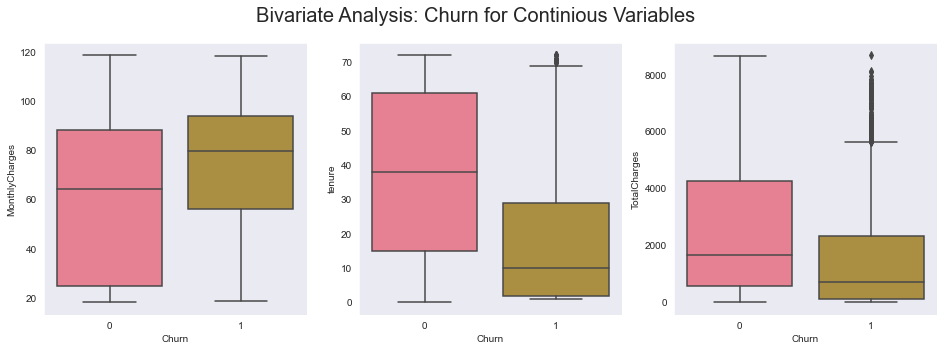

In [23]:
# Visulizing Churn rate for continious features
fig, axes = plt.subplots(1, 3, figsize=(16,5))
df.replace({'Yes':1, 'No':0}, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['Churn'] = pd.to_numeric(df['Churn'])
fig.suptitle('Bivariate Analysis: Churn for Continious Variables', size=20)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[1])
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2]);

<b>We can identify some customers that have higher churn rates:</b>
<br>
- Senior Citizens
- Customers with shorter contracts
- Customers with "Electronic Checks" as Payment Method (also paperless billing)
- Customers without partners
- Customers with FiberOptic as Internet Service
- Customers with some kind of Internet Service but without extra services such as "OnlineSecurity", "OnlineBackup", "DeviceProtection" and "TechSupport"
- Newly signed customers (customers with low tenures)
- Customers with higher than average Monthly Costs
<br>
<br>
<b>We can also identify those who are less likely to churn:</b>
- Customers with depedents 
- Customers with automatic payments

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


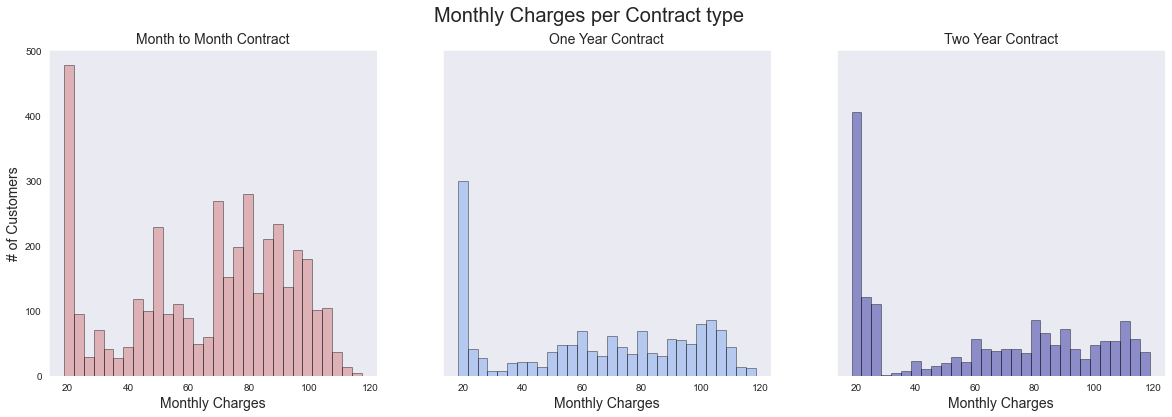

In [24]:
fig, axes = plt.subplots(1, 3, sharey = True, figsize = (20,6))
fig.suptitle('Monthly Charges per Contract type', size=20)

sns.distplot(df[df['Contract']=='Month-to-month']['MonthlyCharges'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'indianred',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[0])
axes[0].set_ylabel('# of Customers', size=14)
axes[0].set_xlabel('Monthly Charges', size=14)
axes[0].set_title('Month to Month Contract', size=14)

sns.distplot(df[df['Contract']=='One year']['MonthlyCharges'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'cornflowerblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[1])
axes[1].set_xlabel('Monthly Charges',size = 14)
axes[1].set_title('One Year Contract',size = 14)

sns.distplot(df[df['Contract']=='Two year']['MonthlyCharges'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[2])
axes[2].set_xlabel('Monthly Charges', size=14)
axes[2].set_title('Two Year Contract', size=14);

<i>The distribution of Monthly Charges is more spread out and somewhat higher for shorter contracts. We know that both higher Monthly Costs and shorter Contract Types are correlated to higher churn rates.</i>

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

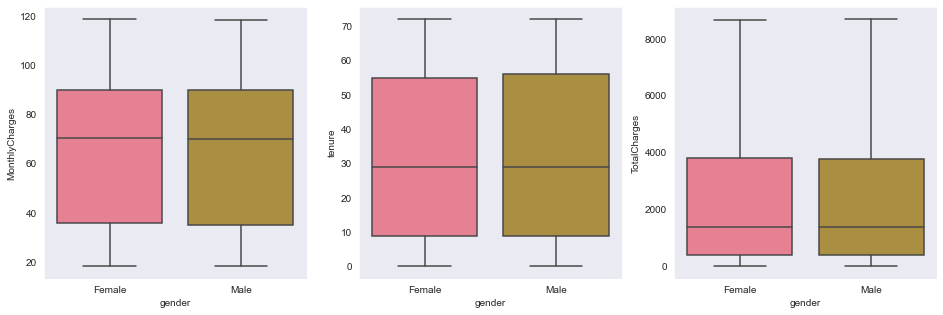

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
sns.boxplot(x='gender', y='MonthlyCharges', data=df, ax=axes[0])
sns.boxplot(x='gender', y='tenure', data=df, ax=axes[1])
sns.boxplot(x='gender', y='TotalCharges', data=df, ax=axes[2])
            

<i>Continous distributions between genders are similar.</i>

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

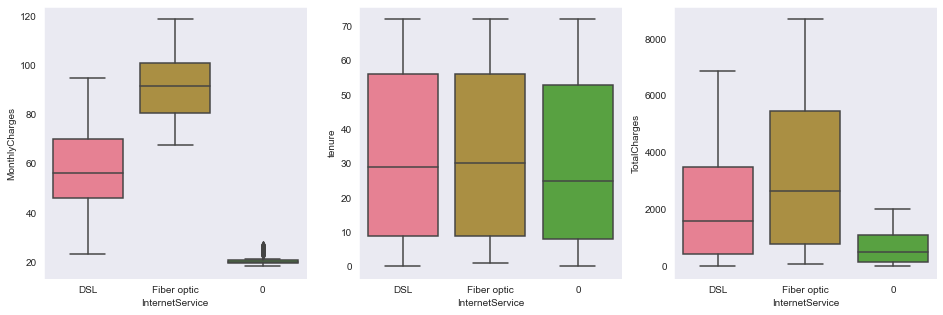

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=df, ax=axes[0])
sns.boxplot(x='InternetService', y='tenure', data=df, ax=axes[1])
sns.boxplot(x='InternetService', y='TotalCharges', data=df, ax=axes[2])

<i>Customers with Internet Services have higher monthly and total charges, which make sense. Their tenure is very similar to those who don't have Internet Service</i>

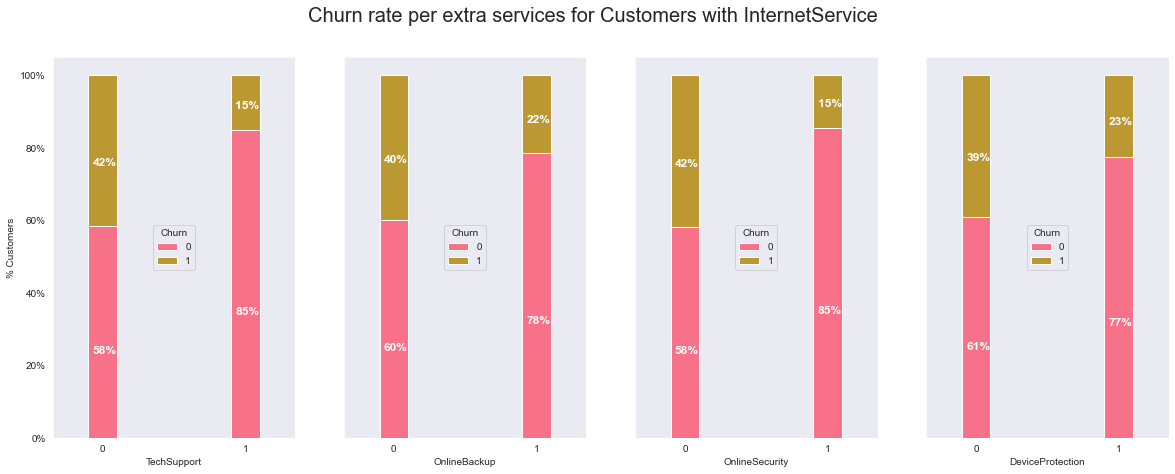

In [27]:
with_internet = df[df['InternetService'] != 0]
import matplotlib.ticker as mtick
##
fig, axes = plt.subplots(1, 4, figsize=(20,7), sharey=True)
plt.subplots_adjust(hspace=0.4)
fig.suptitle('Churn rate per extra services for Customers with InternetService', size=20)
##
tech_c = with_internet.groupby(['TechSupport','Churn']).size().unstack()
ax = (tech_c.T*100.0 / tech_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[0])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)
##
online_c = with_internet.groupby(['OnlineBackup','Churn']).size().unstack()
ax = (online_c.T*100.0 / online_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)
##
onlines_c = with_internet.groupby(['OnlineSecurity','Churn']).size().unstack()
ax = (onlines_c.T*100.0 / onlines_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[2])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)
##
device_c = with_internet.groupby(['DeviceProtection','Churn']).size().unstack()
ax = (device_c.T*100.0 / device_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[3])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)

<i>As indicated earlier, we can see in the stacked bar charts above that the churn rates for customer who has Internet Service, but no extra services, are higher.</i>
<br>
<br>
<b> We can also look at the correlations in a corr plot:</b>

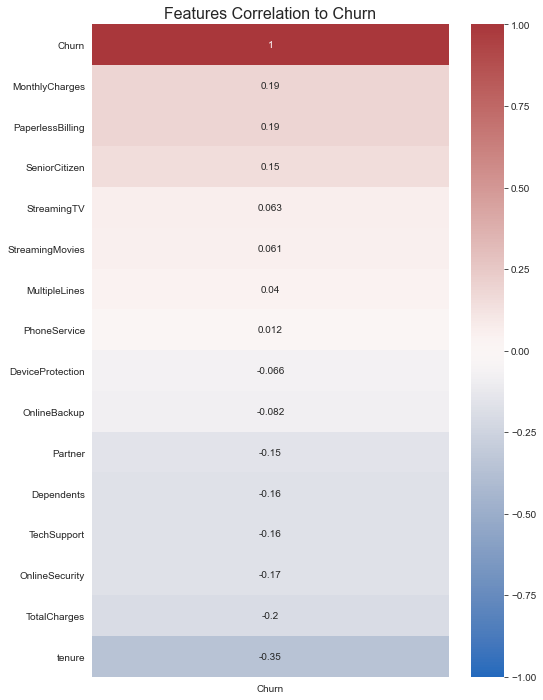

In [28]:
df.replace({'Yes':1, 'No':0, 'No internet service':0, 'No phone service': 0}, inplace=True)
plt.figure(figsize=(8, 12))
corr = sns.heatmap(df.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
corr.set_title('Features Correlation to Churn', fontdict={'fontsize':16});

# Summary
- The biggest correlation to churn <i>(except from tenure)</i> is customers with high Monthly Charges and/or Total Charges, and Paperless Billing. Monthly Charges can be higher due to more services such as Internet or that the customer has a shorter contract, since both correlates to highter monthly costs. 
<br>
<br>
- Most of our customers (78%) have Internet Services. 
<br>
<br>
- Out of those who have Internet Services, we can see a clear difference in churn rate between those who have extra services such as Tech Support or Online Backup. The customers who have these extra services have a churn rate lower than average, while those who haven't, have a churn rate above average.
<br>
<br>
- Customers with automatic payments are less likely to churn. However, 57 percent of our customers don't have automatic payments! 34 percent of our customers pay by electronic check, where the churn rate is 45% (!)

# <font color='green'>Logistic Regression</font>
<b> I will now use Logistic Regression in order to predict the likelyhood that each customer will churn.</b>

<i>I would like all columns that are not continious to be binary. I will change the Yes/No columns to 1/0. 
    <br>I will then use pandas dummies</i>

In [29]:
df.replace({'Yes':1, 'No':0, 'No internet service':0, 'No phone service': 0}, inplace=True)

In [30]:
df = pd.get_dummies(df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [32]:
#df.head().T

In [33]:
#df.corr()["Churn"].sort_values()

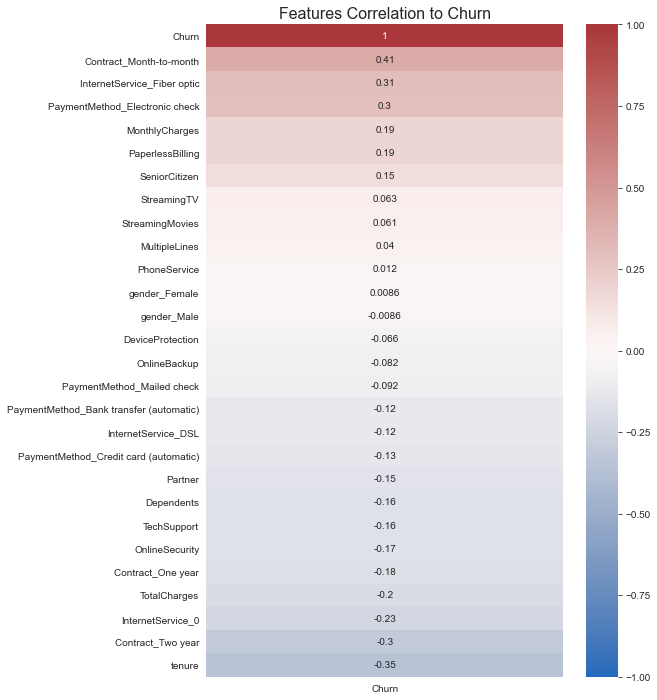

In [34]:
# Visulaising the correlaction between all features and our dependent variable (Churn)
plt.figure(figsize=(8, 12))
corr = sns.heatmap(df.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
corr.set_title('Features Correlation to Churn', fontdict={'fontsize':16});

In [35]:
Y = df["Churn"].values
X = df.drop(labels = ["Churn"],axis = 1)

# Scaling the feature variables 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [37]:
# Checking if the churn rate in the train data is similar to our test data
display(sum(y_test==1) / len(y_test))
display(sum(y_train==1) / len(y_train))

0.26786559394226217

0.2643002028397566

In [38]:
# Training the model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [39]:
# Importing accuracy tools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, log_loss

In [40]:
# Evaluation Metrics
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[1365  182]
 [ 263  303]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1547
           1       0.62      0.54      0.58       566

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

0.7893989588263133


<i>Our model has an accuracy of 79%. However, our highest priority is to identify customers who are likely to churn. In this case, the model only identified 54% of the customers who churns. </i>

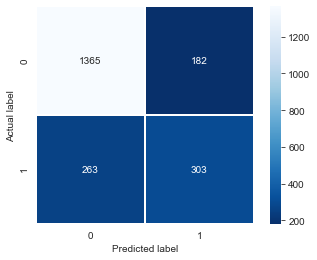

In [41]:
cm = confusion_matrix(y_test, y_pred)
labels = [i for i in cm]
ax = sns.heatmap(cm, linewidths=.5, square = True, cmap = 'Blues_r', annot=labels, fmt = '')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

'AUC Interpretation:'

'A: Outstanding = 0.9 to 1.0'

'B: Excellent/Good = 0.8 to 0.9'

'C: Acceptable/Fair = 0.7 to 0.8'

'D: Poor = 0.6 to 0.7'

'E: No Discrimination = 0.5 to 0.6'

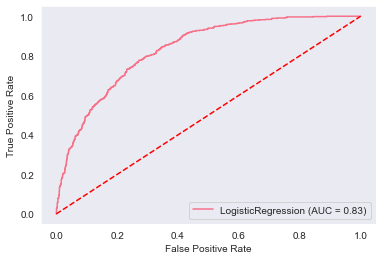

In [42]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
display('AUC Interpretation:',
'A: Outstanding = 0.9 to 1.0',
'B: Excellent/Good = 0.8 to 0.9',
'C: Acceptable/Fair = 0.7 to 0.8',
'D: Poor = 0.6 to 0.7',
'E: No Discrimination = 0.5 to 0.6')

The ROC-curve indicates that our model is a good classifier since it stays somewhat high in the left corner. A model that would randomly classify labels would follow the red line. 

# <font color='green'>Suggestions</font>

In [43]:
#The current lost revenue for customers without automatic payment:
df3 = df.loc[(df['PaymentMethod_Electronic check'] == 1) | (df['PaymentMethod_Mailed check'] == 1)]
sum(df3['MonthlyCharges'][df3['Churn'] == 1])

101092.35000000002

In [44]:
#The current lost revenue for customers without add-ons churning is:
df8 = df[df['InternetService_0'] == 0]
df8 = df8[(df8['OnlineBackup'] == 0) & (df8['OnlineSecurity'] == 0) & (df8['DeviceProtection'] == 0) & (df8['TechSupport'] == 0) ]
sum(df8['MonthlyCharges'][df8['Churn'] == 1])

50806.05

Firstly, I would suggest increased marketing of add on-services such as Tech Support, Online Backup, Online Security & DeviceProtection towards customers who already have Internet Services. The current lost revenue for customers who does not have any of these add ons is > 5000 per month! What if we could have made them stay by promoting these extra services, which also contributes to more sales for the company?

Secondly, I would suggest that the company promotes automatic payments in a larger scale to both new and current customers. The current lost revenue for customers without paperless billing who churned is > 100 000! If we reached out to these customers, and that made just 10% of them stay, that would mean 10 000 more in sale per month for the company.

I would also suggest that the company takes action on their best customers; those with high monthlty charges. They are valuable for the company but also have a higher risk of churn. What can we do to make these customers stay? Can we offer them something, like a loyalty program, to make them feel that it's worth staying?
